<a href="https://colab.research.google.com/github/Govind23117051/Govind23117051/blob/main/dai%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('tips (data for regression problem).csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


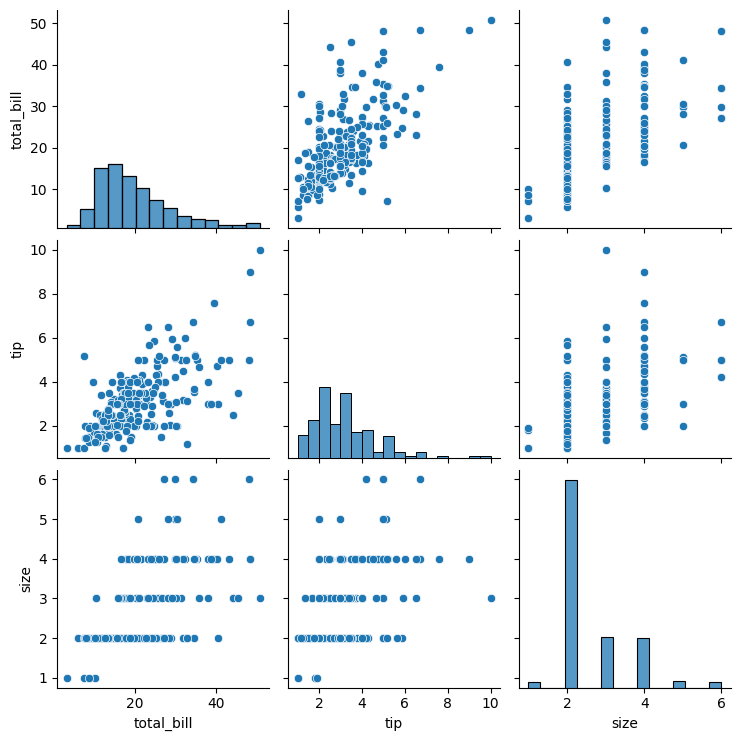

In [45]:
sns.pairplot(df)
plt.show()

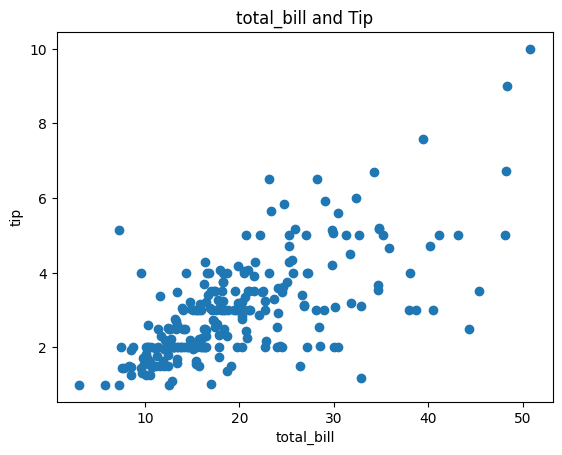

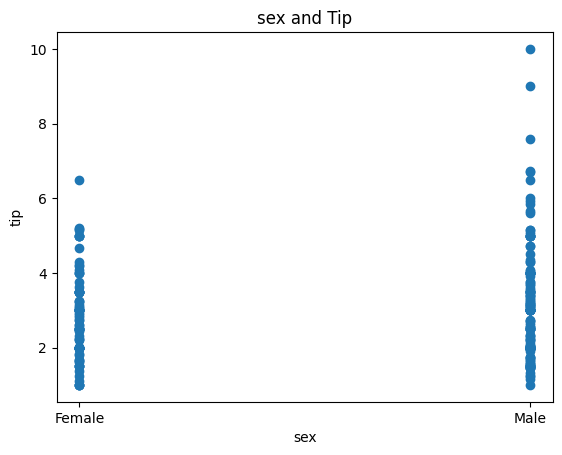

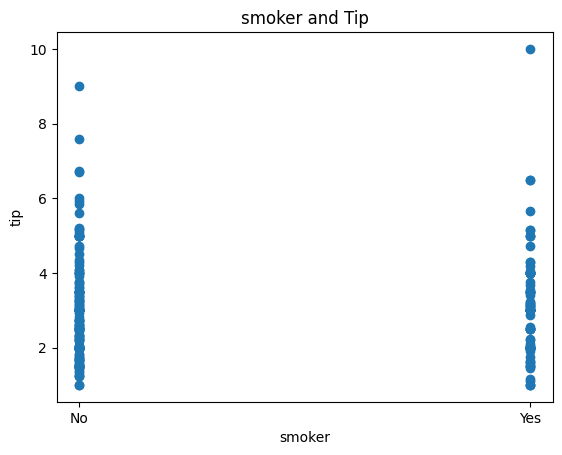

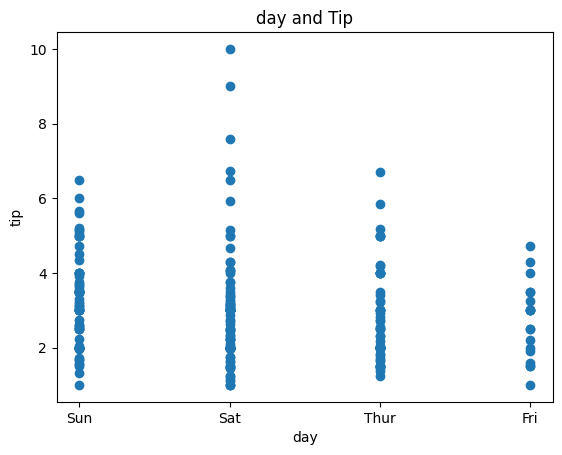

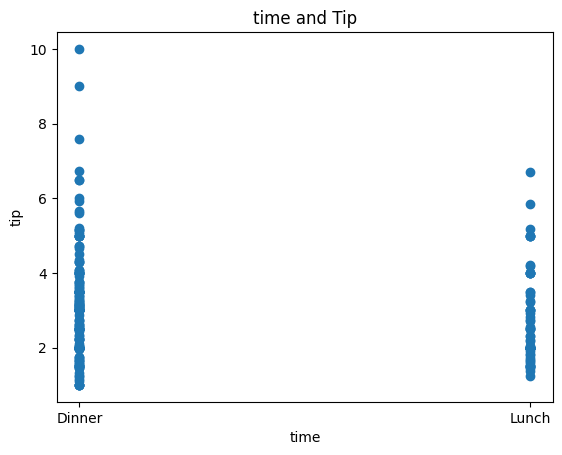

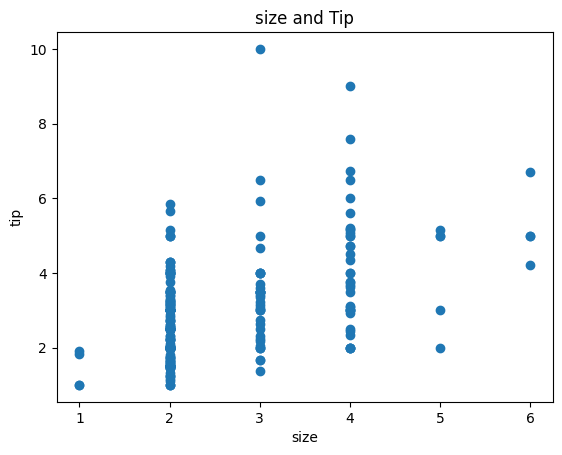

In [46]:
df_feature = df.drop(columns=['tip'])
df_target = df['tip']

for i in range(0,6):
    plt.scatter(df_feature.iloc[:,i], df_target)
    plt.xlabel(df_feature.columns[i])
    plt.ylabel('tip')
    plt.title(df_feature.columns[i] + ' and Tip')
    plt.show()


.More tips are associated with higher total bills.
. Tips are generally higher during dinner compared to lunch.
. Sunday sees the highest average tip amounts.
. Saturday shows the highest variability in tip amounts and Friday has lost tip
. Men tend to tip significantly more than women.
. Tip amount is almost same in smokers and non smokers

<Axes: >

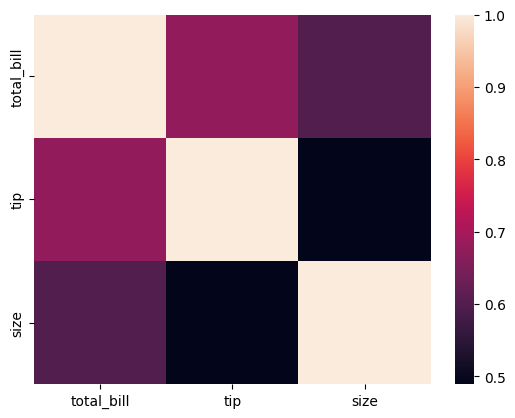

In [47]:
# Convert variable datatypes to get correlation matrix
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

In [48]:
label_encoder = LabelEncoder()
df_feature['sex'] = label_encoder.fit_transform(df['sex'])
df_feature['smoker'] = label_encoder.fit_transform(df['smoker'])
df_feature['day'] = label_encoder.fit_transform(df['day'])
df_feature['time'] = label_encoder.fit_transform(df['time'])

In [49]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = df_feature
X = sm.add_constant(X)
y = df_target

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [50]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.203627451012659
P-value: 0.15798464222013286


In [51]:
tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# Evaluate model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression " "\nR^2:", r2_lr, )

Linear Regression 
R^2: 0.43730181943482493


In [53]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluate model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression " "\nR^2:", r2_ridge, )

Ridge Regression 
R^2: 0.4393889716178483


In [54]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluate model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression " "\nR^2:", r2_lasso)

Lasso Regression 
R^2: 0.5273068720881755


In [55]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

# Evaluate model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest " "\nR^2:", r2_forest)

Random Forest 
R^2: 0.2642455218065466


In [56]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("SVR " "\nR^2:", r2_svr)

SVR 
R^2: 0.47802527943520123


In [57]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors " "\nR^2:", r2_knn)

K-Nearest Neighbors 
R^2: 0.29888587066985495


In [58]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("Decision Tree " "\nR^2:", r2_tree)

Decision Tree 
R^2: -0.004178121600921791


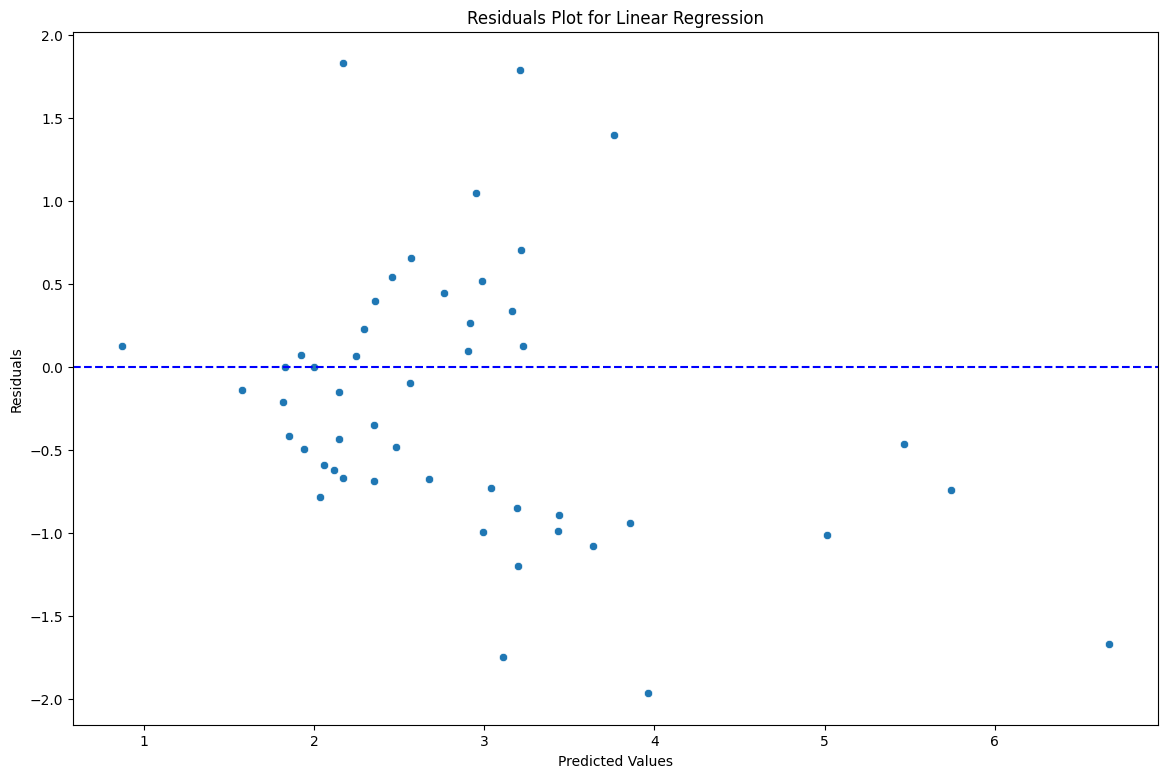

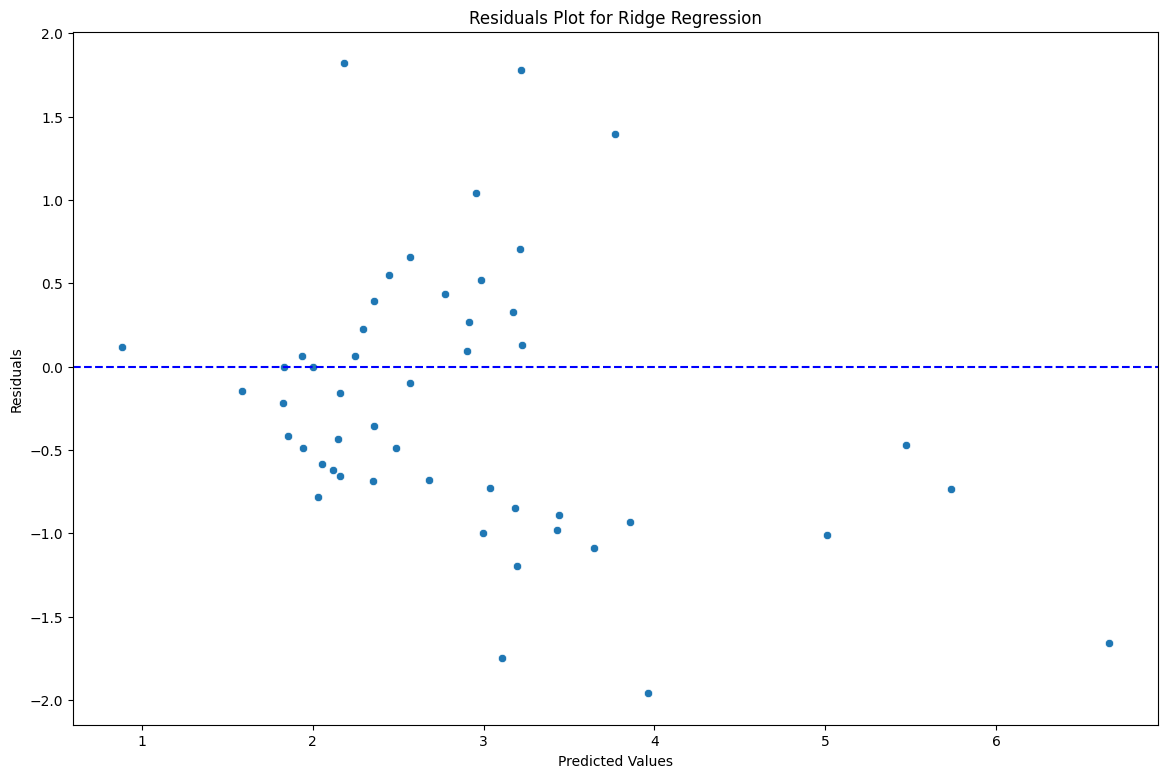

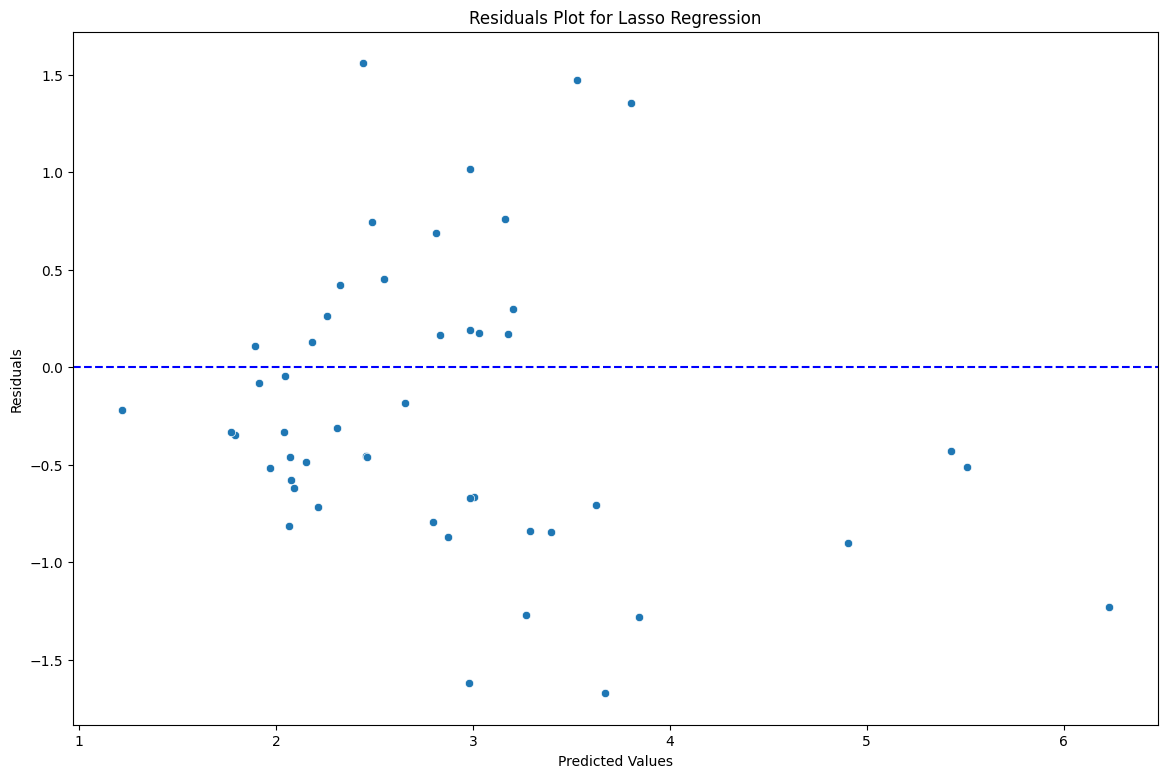

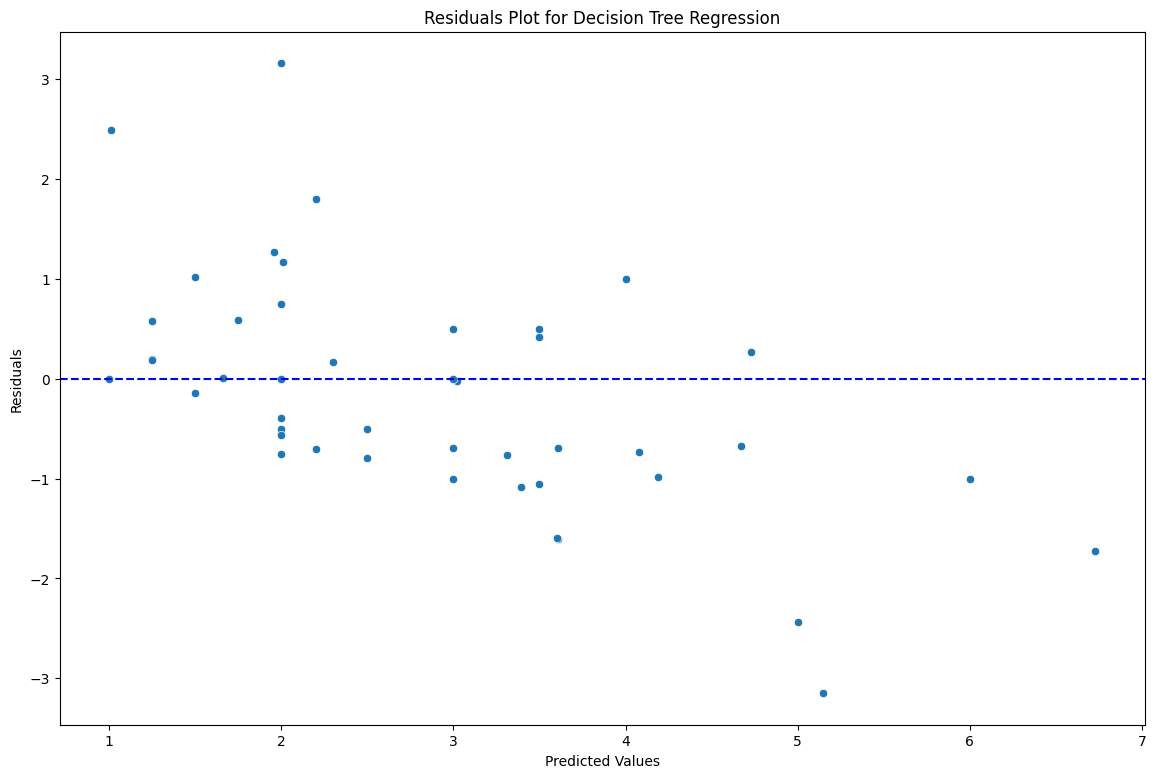

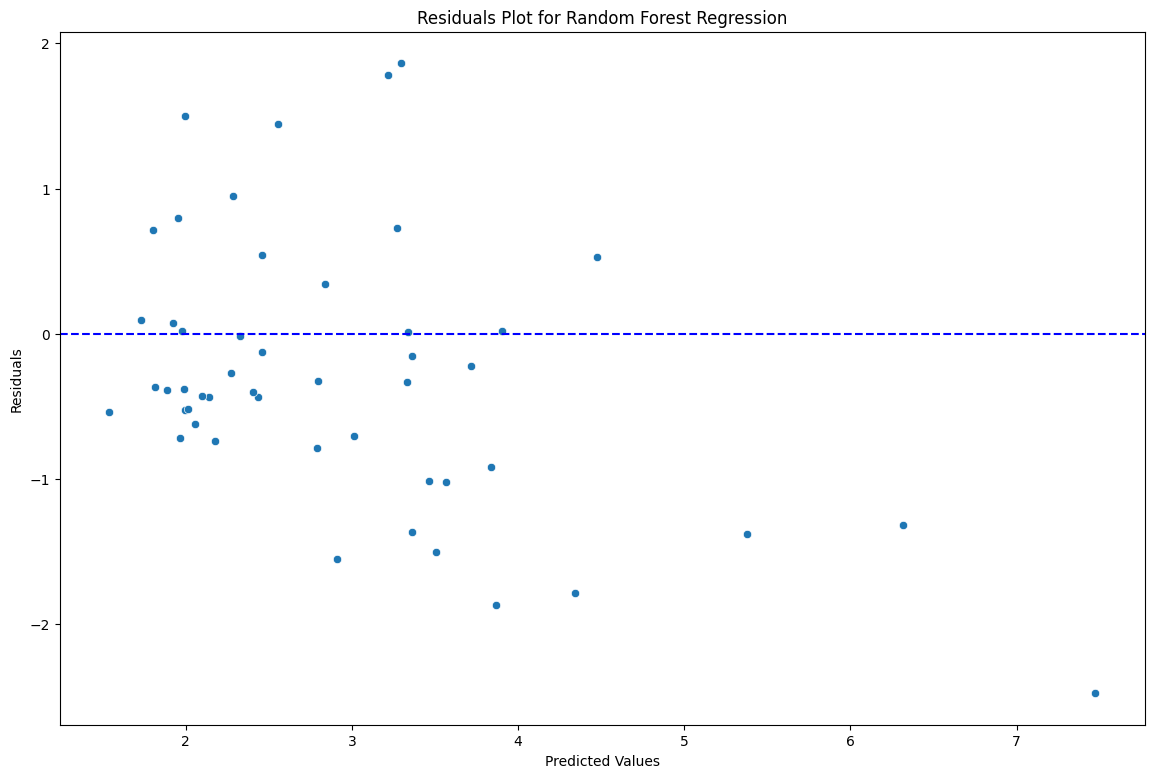

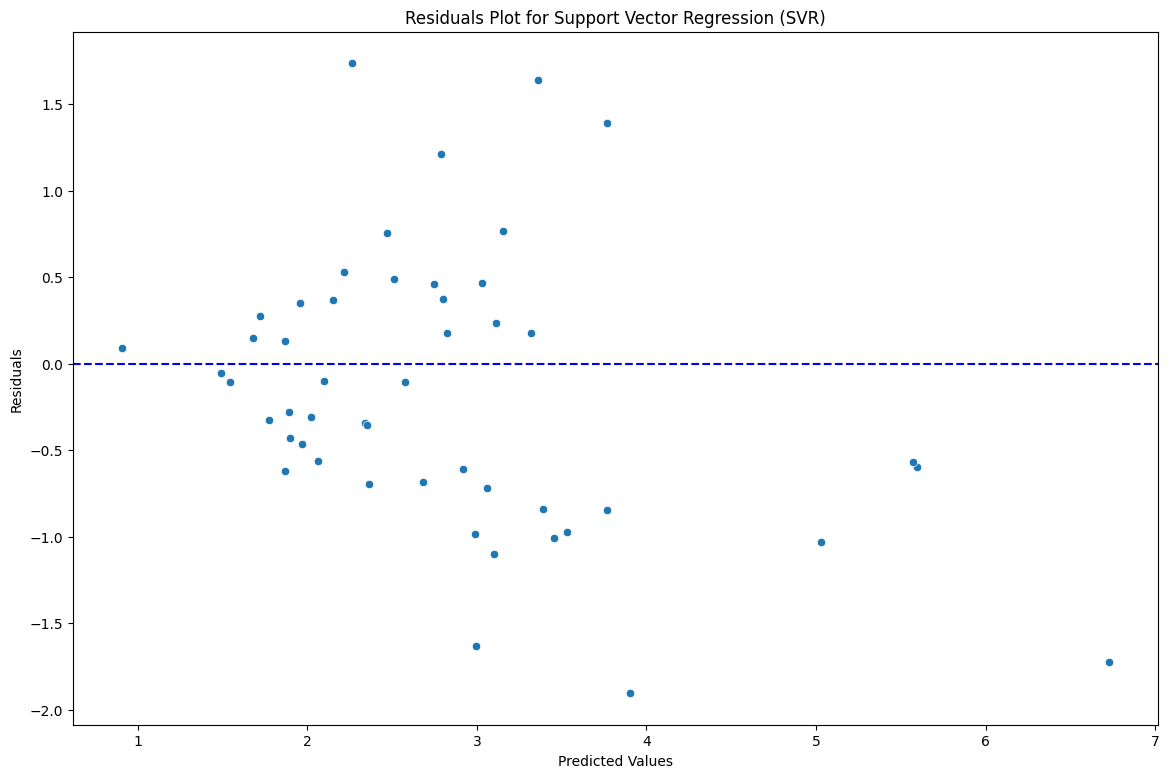

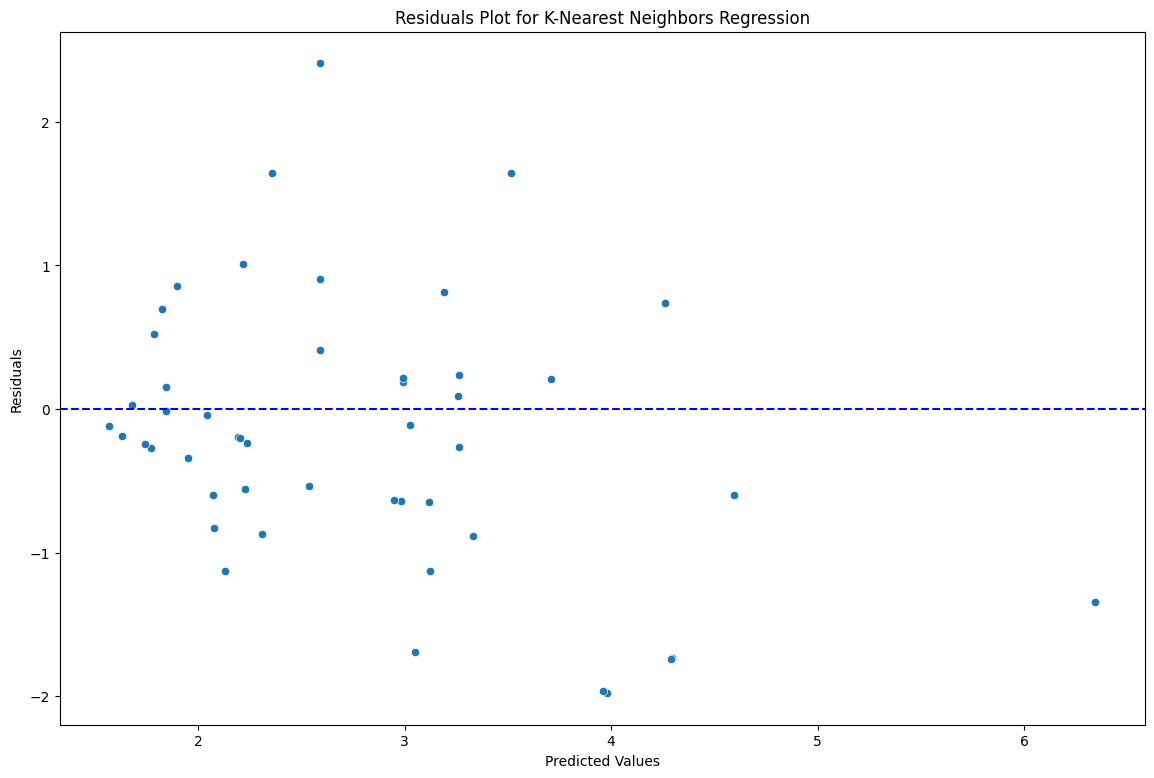

In [59]:
# Define a list of models and their names for easier looping
models = {
    "Linear Regression": lin_reg,
    "Ridge Regression": ridge,
    "Lasso Regression": lasso,
    "Decision Tree Regression": tree,
    "Random Forest Regression": forest,
    "Support Vector Regression (SVR)": svr,
    "K-Nearest Neighbors Regression": knn
}

# Loop over each model, make predictions, and plot residuals
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_residuals(y_test, y_pred, model_name)


# Conclusion
1. Optimize for Peak Times and Days
2. Encourage Higher Bills
3. Give discount on day like friday